## Budgets for flux-form equations

The continuity equation
$$
\partial_t h_k = - \nabla \cdot \left( h_k {\bf v}_k \right)
$$
describes the evolution of the thickness of an ocean layer in a reduced gravity model. $k$ is the layer number in the vertical direction (usually $k=1$ is the top layer), $h_k$ is the layer thickness, $t$ is time, ${\bf v}_k = (u,v)$ is the horizontal velocity vector, and $\nabla \cdot \equiv (\partial_x, \partial_y)$ is the horizontal divergence operator where $x$ and $y$ are the horizontal spatial dimensions.

The divergence operator is discretized as
$$
\nabla \cdot \left( h_k {\bf v}_k \right) = \frac{1}{A}
\left( \delta_i \left( h_k u_k \right) + \delta_j \left( h_k v_k \right) \right) 
$$
where
$$
\delta_i \phi \equiv \phi_{i+\frac{1}{2},j} - \phi_{i-\frac{1}{2},j}
$$
and
$$
\delta_j \phi \equiv \phi_{i,j+\frac{1}{2}} - \phi_{i,j-\frac{1}{2}}
$$
and by convention $i$ is the cell number in the $x$-direction so that the center of the cell is $x_i =  ( i - \frac{1}{2} ) \Delta x$ for uniformly spaced grid. Similarly, $y_j = ( j - \frac{1}{2} ) \Delta y$.

Integrating the continuity equation over the time period between $t=t_A$ and $t=t_B$ we obtain
$$
\frac{ h_k(t_B) - h_k(t_A) }{ t_B - t_A } = - \nabla \cdot \left( \overline{ h_k {\bf v}_k } \right)
$$
where an overline indicates a time average:
$$
\overline{ \phi } \equiv \frac{ 1 }{ t_B - t_A } \int_{t_A}^{t_B} \phi(t) \,dt
$$

MOM6 can diagnose the time average of the flux terms in the continuity equations, $hu$ and $hv$, as well as the instantaneous $h$.

Verify that MOM6 diagnostics satisfy the continuity equation by
1. diagnose $\delta_i \left( h_k u_k \right) + \delta_j \left( h_k v_k \right)$ for levels $k=1$ and $k=2$
2. diagnose $$\frac{A \left( h_k(t_B) - h_k(t_A) \right)}{t_B - t_A}$$ for levels $k=1$ and $k=2$

In [24]:
%pylab inline
import netCDF4
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [50]:
from netCDF4 import Dataset
snapshots = Dataset('200x200x5000days/snapshot.nc', "r", format="NetCDF4")
ave = Dataset('200x200x5000days/ave_prog.nc', "r", format="NetCDF4")
continuity = Dataset('200x200x5000days/continuity.nc', "r", format="NetCDF4")
og = Dataset('200x200x5000days/ocean_geometry.nc', "r", format="NetCDF4")

In [60]:
for v in og.variables:
    print(v)

lath
lonh
latq
lonq
geolatb
geolonb
geolat
geolon
D
f
dxCv
dyCu
dxCu
dyCv
dxT
dyT
dxBu
dyBu
Ah
Aq
dxCvo
dyCuo
wet


In [61]:
ah = og.variables['Ah']

In [79]:
for v in ave.variables:
    print(v)

xh
yh
Time
nv
xq
zl
yq
zi
areacello
u
v
h
e
RV
PV
average_T1
average_T2
average_DT
Time_bnds


In [49]:
continuity

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    filename: continuity.nc
    title: double gyre
    grid_type: regular
    grid_tile: N/A
    dimensions(sizes): xh(200), yh(200), Time(10), nv(2), zl(2), xq(201), yq(201)
    variables(dimensions): float64 xh(xh), float64 yh(yh), float64 Time(Time), float64 nv(nv), float64 zl(zl), float64 xq(xq), float64 yq(yq), float32 areacello(yh,xh), float32 dhdt(Time,zl,yh,xh), float32 uh(Time,zl,yh,xq), float32 vh(Time,zl,yq,xh), float32 uhbt(Time,yh,xq), float32 vhbt(Time,yq,xh), float64 average_T1(Time), float64 average_T2(Time), float64 average_DT(Time), float64 Time_bnds(Time,nv)
    groups: 

In [52]:
snapshots

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    filename: snapshot.nc
    title: double gyre
    grid_type: regular
    grid_tile: N/A
    dimensions(sizes): xh(200), yh(200), Time(10), xq(201), zl(2), yq(201)
    variables(dimensions): float64 xh(xh), float64 yh(yh), float64 Time(Time), float64 xq(xq), float64 zl(zl), float64 yq(yq), float32 areacello(yh,xh), float32 u(Time,zl,yh,xq), float32 v(Time,zl,yq,xh), float64 h(Time,zl,yh,xh)
    groups: 

In [56]:
snapshots.variables['Time'][:]

array([ 500., 1000., 1500., 2000., 2500., 3000., 3500., 4000., 4500.,
       5000.])

Noticed that `u` and `v` had an extra column/row.

In [29]:
data['u']

<class 'netCDF4._netCDF4.Variable'>
float32 u(Time, zl, yh, xq)
    long_name: Zonal velocity
    units: m s-1
    missing_value: 1e+20
    _FillValue: 1e+20
    cell_methods: zl:mean yh:mean xq:point time: point
    interp_method: none
unlimited dimensions: Time
current shape = (10, 2, 200, 201)
filling off

In [30]:
data['v']

<class 'netCDF4._netCDF4.Variable'>
float32 v(Time, zl, yq, xh)
    long_name: Meridional velocity
    units: m s-1
    missing_value: 1e+20
    _FillValue: 1e+20
    cell_methods: zl:mean yq:point xh:mean time: point
    interp_method: none
unlimited dimensions: Time
current shape = (10, 2, 201, 200)
filling off

In [31]:
uh = continuity['uh']
vh = continuity['vh']

Slicing each of the variables:

In [38]:
h = data['h']
v = data['v']
u = data['u']

Instantiating a numpy array with zeroes that is 200 x 200

In [33]:
n = 200
arr = np.zeros((n,n), dtype=np.float)

Divergence

In [41]:
div = uh[1, 0, :, 1:].filled(0) - uh[1, 0, :, :-1].filled(0) + (vh[1, 0, 1:, :].filled(0) - vh[1, 0, :-1, :].filled(0))

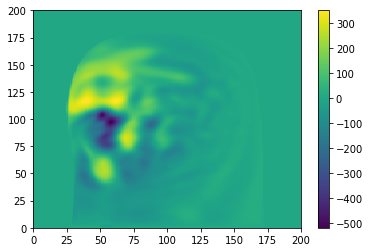

In [47]:
plt.pcolormesh(div)
plt.colorbar()

In [73]:
delta_h = h[1, 0, :, :] - h[0, 0, :, :]
delta_t = (snapshots.variables['Time'][1] - snapshots.variables["Time"][0]) * 86400

In [74]:
time = snapshots.variables['Time']
time

<class 'netCDF4._netCDF4.Variable'>
float64 Time(Time)
    long_name: Time
    units: days since 0001-01-01 00:00:00
    cartesian_axis: T
    calendar_type: JULIAN
    calendar: JULIAN
unlimited dimensions: Time
current shape = (10,)
filling off

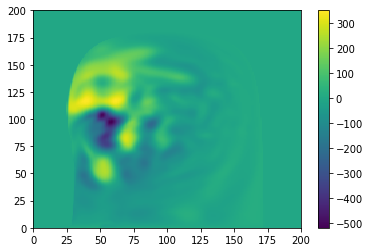

In [75]:
plt.pcolormesh(-delta_h * ah / delta_t)
plt.colorbar()

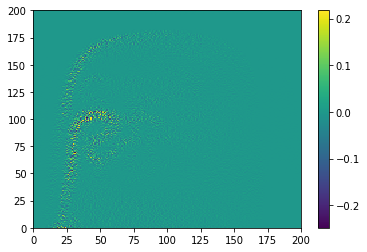

In [78]:
plt.pcolormesh(delta_h * ah / delta_t + div)
plt.colorbar()

Looping through `arr` to calculate the change in delta. Document that shouldn't use quadratic loop

Use `np.roll`: https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.roll.html

In [23]:
for j in range(n):
    for i in range(n):
        try:
            arr[j][i] = h[j,i] * u[j,i+1] - h[j,i] * u[j,i] + (h[j,i]*v[j+1,i] - h[j,i]*v[j,i])
        except:
            continue

/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Warning: converting a masked element to nan.


Noticed that there were undefined values in the data that made for all the `nan`s that appeared when we tried to calculate.

In [25]:
arr

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan, -0.10618791, -0.0556858 , ..., -0.00197806,
        -0.00331988,         nan],
       [        nan,  0.04338502,  0.03070331, ..., -0.00347992,
        -0.00473493,         nan],
       ...,
       [        nan,  0.01108602,  0.00743854, ..., -0.02460759,
        -0.0263961 ,         nan],
       [        nan,  0.0105397 ,  0.00648176, ..., -0.02889487,
        -0.03093488,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])